## Correlation and Regression Part 1

*(Coding along with the Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/) by Alexander Hagmann.)*

### Covariance

The covariance between two random variables measures the degree to which the two variables move together. It captures the linear relationship.

<img src="../assets/images/covariance_formula.png" width="70%" />

__Properties:__

- Positive covariance: variables move together

- Negative covariance: variables move in opposite directions

- Covariance of variable with itself == variance

__Pitfalls:__

- The actual value of the covariance is not meaningful and hard to interpret

- The actual value of the covariance can range from minus to plus infinity

- The actual value of the covariance is in squared units which are hard to interpret

### Correlation Coefficient

The correlation coefficient (r) measures the strength of the linear relationship (correlation) between two variables. It's the standardized covariance and is easier to interpret because its values are between 1 and +1.

<img src="../assets/images/correlation_formula.png" width="70%" />

__Interpretation:__

<img src="../assets/images/correlation_interpretation.png" width="70%" />

*(The screenshots are taken from Alexander Hagmann's Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/).)*

### Calculating Covariance and Correlation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../assets/data/bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [3]:
df

,title,budget,revenue
release_date,,,
1915-02-08,The Birth of a Nation,0.100000,11.000000
1915-12-13,The Cheat,0.017311,0.137365
1916-12-24,"20,000 Leagues Under the Sea",0.200000,8.000000
1918-08-01,Mickey,0.250000,8.000000
1921-01-21,The Kid,0.250000,2.500000
...,...,...,...
2017-07-26,Atomic Blonde,30.000000,90.007945
2017-07-28,The Emoji Movie,50.000000,66.913939
2017-08-03,The Dark Tower,60.000000,71.000000


In [4]:
df = df.loc["2016"]

In [5]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2016-01-01 to 2016-12-25
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    235 non-null    object 
 1   budget   235 non-null    float64
 2   revenue  235 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.3+ KB


In [7]:
df.describe()

,budget,revenue
count,235.000000,235.000000
mean,40.461695,126.074160
std,51.435816,215.314723
min,0.000500,0.000050
25%,8.500000,5.889868
50%,20.000000,32.000000
75%,45.500000,142.200330
max,250.000000,1153.304495


In [8]:
df.mean(numeric_only=True)

budget      40.461695
revenue    126.074160
dtype: float64

In [9]:
df.var(numeric_only=True)

budget      2645.643127
revenue    46360.429784
dtype: float64

In [10]:
df.cov(numeric_only=True)

,budget,revenue
budget,2645.643127,8861.380845
revenue,8861.380845,46360.429784


In [11]:
df.budget.cov(df.revenue)

np.float64(8861.380845230346)

In [12]:
df.corr(numeric_only=True)

,budget,revenue
budget,1.000000,0.800133
revenue,0.800133,1.000000


In [13]:
df.budget.corr(df.revenue)

np.float64(0.8001327462030162)

In [14]:
df.budget.cov(df.revenue) / (df.budget.std() * df.revenue.std())

np.float64(0.8001327462030163)

In [15]:
np.cov(df.budget, df.revenue)

array([[ 2645.64312661,  8861.38084523],
       [ 8861.38084523, 46360.42978363]])

In [16]:
np.corrcoef(df.budget, df.revenue)

array([[1.        , 0.80013275],
       [0.80013275, 1.        ]])

### Visual Interpretation with Scatterplots

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

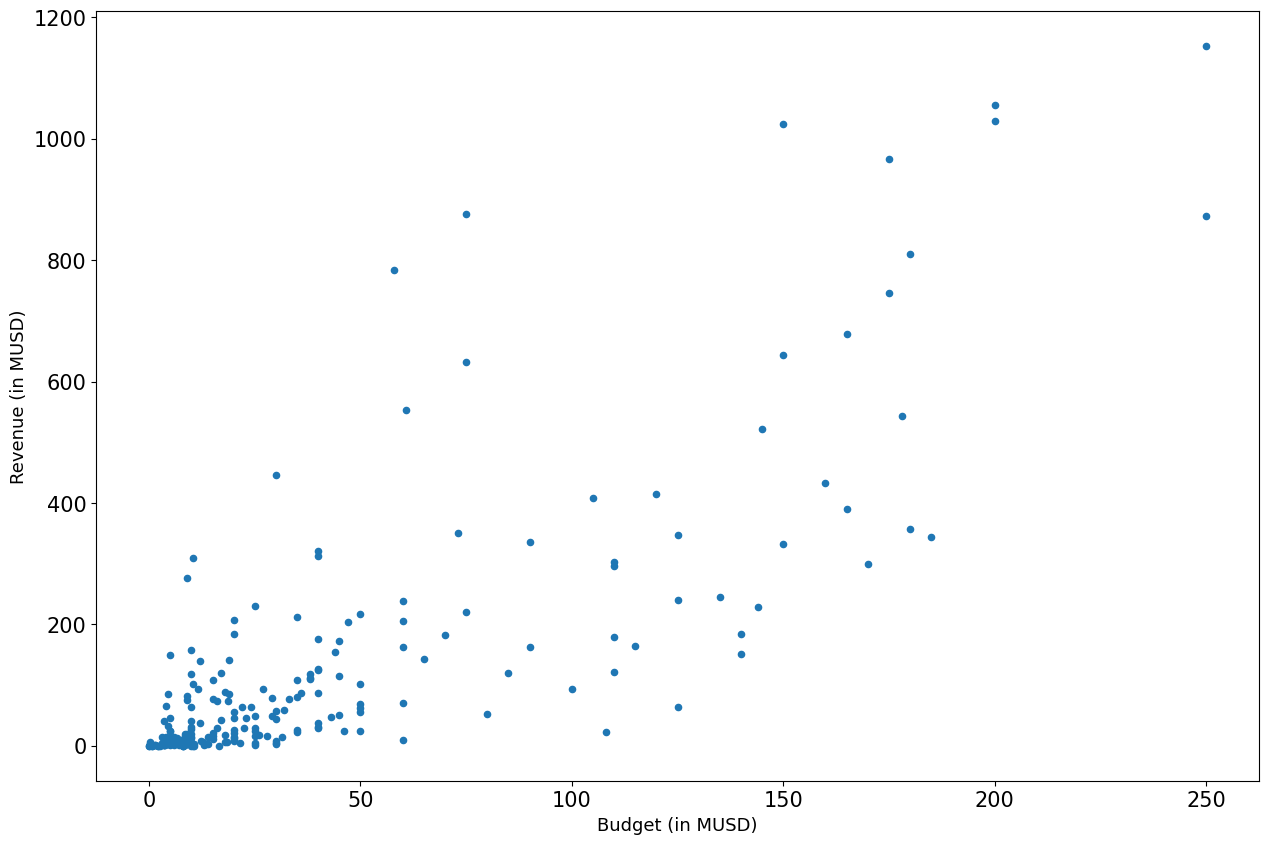

In [19]:
df.plot(kind = "scatter", x = "budget", y = "revenue", figsize = (15, 10), fontsize = 15)
plt.xlabel("Budget (in MUSD)", fontsize = 13)
plt.ylabel("Revenue (in MUSD)", fontsize = 13)
plt.show()

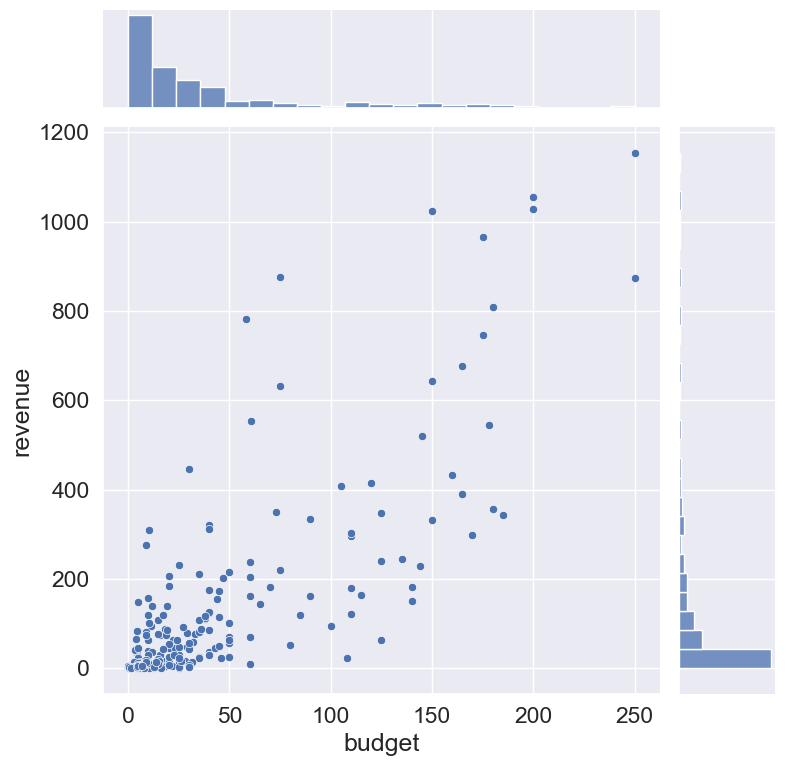

In [20]:
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "budget", y = "revenue", height = 8)
plt.show()